# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset . Here is an available mirror in case the above website is down: https://data.world/uci/bike-sharing-dataset
3. We split the data into two parts. One dataset containing the last 30 days and one dataset with the rest.

In [1]:
import pandas as pd
import numpy as np

# read raw data
df_all = pd.read_csv('day.csv')

# split dataset
df_last30 = df_all.tail(30)
df = df_all.iloc[:-30, :]

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


In [2]:
# --- Data Cleaning Checks ---
df_all['dteday'] = pd.to_datetime(df_all['dteday'])
df_hour = pd.read_csv("hour.csv")
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

print("Data Shape:", df_all.shape)
print("Data Description: \n", df_all.describe())

# 1. No missing values
assert df_all.isna().sum().sum() == 0, "day.csv has missing values"
assert df_hour.isna().sum().sum() == 0, "hour.csv has missing values"

# 2. No duplicates
assert df_all.duplicated().sum() == 0, "day.csv has duplicates"
assert df_hour.duplicated().sum() == 0, "hour.csv has duplicates"

# 3. cnt = casual + registered
assert (df_all['cnt'] == df_all['casual'] + df_all['registered']).all(), "Mismatch in cnt vs casual+registered in day.csv"
assert (df_hour['cnt'] == df_hour['casual'] + df_hour['registered']).all(), "Mismatch in cnt vs casual+registered in hour.csv"

# 4. Check valid ranges for categorical columns
assert set(df_all['season'].unique()).issubset({1,2,3,4}), "Invalid season values found"
assert set(df_all['weathersit'].unique()).issubset({1,2,3,4}), "Invalid weather situation values found"
assert set(df_all['yr'].unique()).issubset({0,1}), "Invalid year values found"
assert set(df_all['mnth'].unique()).issubset({1,2,3,4,5,6,7,8,9,10,11,12}), "Invalid month values found"
assert set(df_all['weekday'].unique()).issubset({0,1,2,3,4,5,6}), "Invalid weekday values found"
assert set(df_all['holiday'].unique()).issubset({0,1}), "Invalid holiday values found"
assert set(df_all['workingday'].unique()).issubset({0,1}), "Invalid workingday values found"

# 5. Check non-negative counts
assert (df_all[['cnt','casual','registered']] >= 0).all().all(), "Negative values found in day.csv"
assert (df_hour[['cnt','casual','registered']] >= 0).all().all(), "Negative values found in hour.csv"

# 6. Cross-check day.csv vs aggregated hour.csv
df_hour_daily = df_hour.groupby("dteday")['cnt'].sum().reset_index()
df_compare = pd.merge(df_all[['dteday','cnt']], df_hour_daily, on="dteday")
assert (df_compare['cnt_x'] == df_compare['cnt_y']).all(), "Mismatch between day.csv and aggregated hour.csv"


print("\n--------------------------------------------")
print("All data cleaning checks passed successfully")

Data Shape: (731, 16)
Data Description: 
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.0

Data Visualization: 



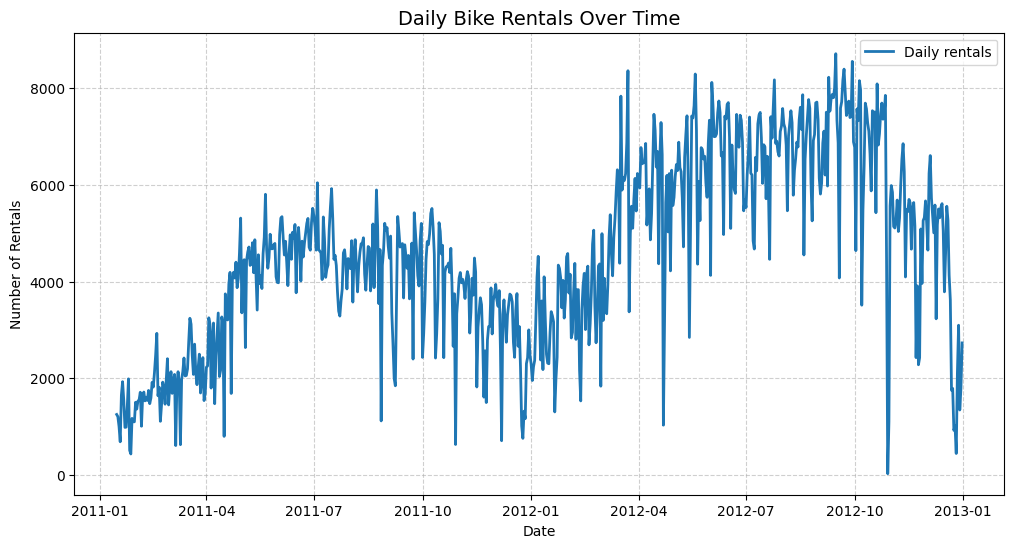

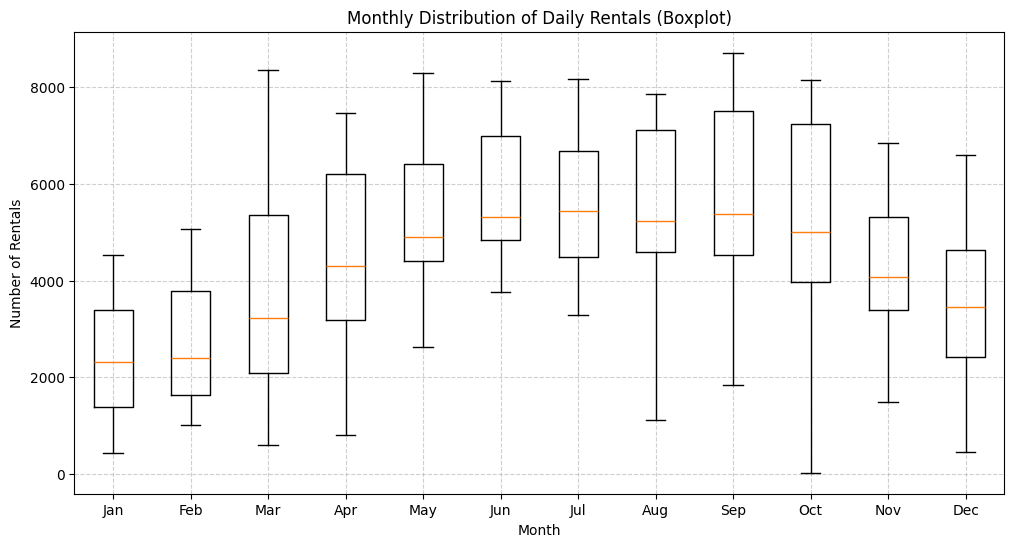

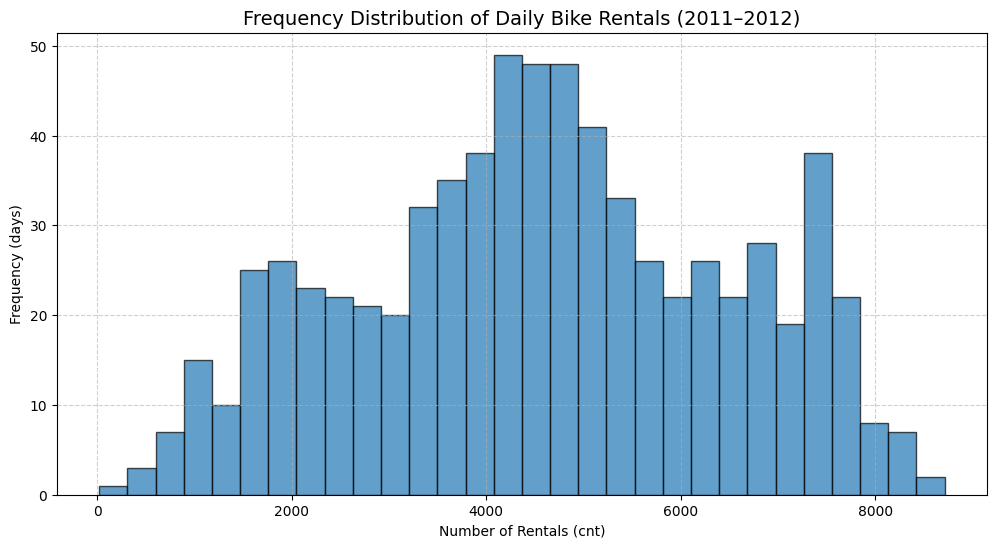

----------------------------------------------------------------------------------------------------------------------------------
Maximum bicycles needed in one day (nmax): 727
95th percentile bicycles needed (n95): 632


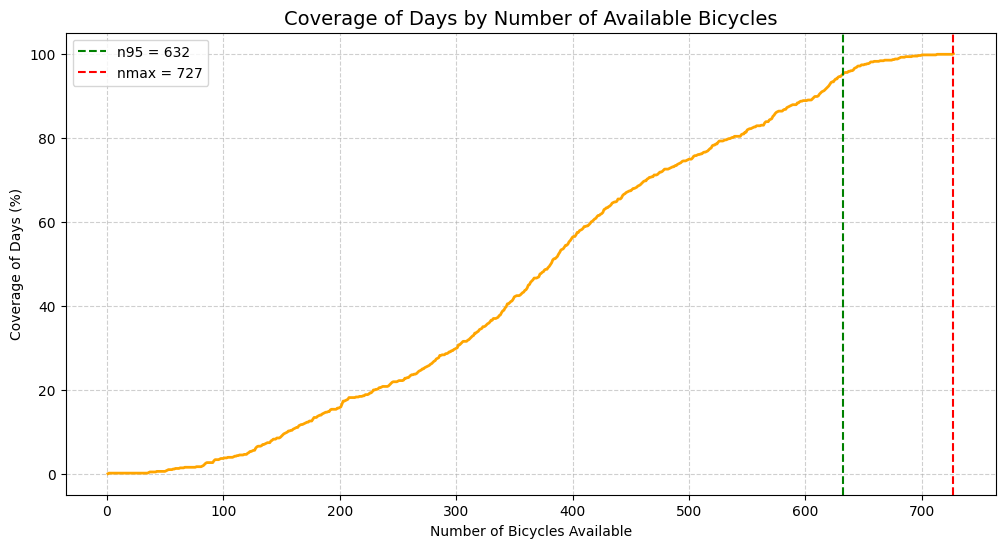

In [11]:
import matplotlib.pyplot as plt

print("Data Visualization: \n")
# --- Time series plot of daily rentals ---
# Visualizes bike demand trends across the full time period (2011–2012).
# Shows seasonality (higher rentals in summer, lower in winter) and overall growth.
plt.figure(figsize=(12,6))
plt.plot(df_all['dteday'], df_all['cnt'], linewidth=2, label="Daily rentals")
plt.title("Daily Bike Rentals Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Monthly boxplot of daily rentals ---
# Groups daily rentals by month to show distribution, variability, and seasonal outliers.
# Winter months (Dec–Feb) show low, stable demand; summer months (Jun–Sep) show higher and more variable demand.
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Prepare data grouped by month
data_by_month = [df_all[df_all['mnth'] == m]['cnt'] for m in range(1,13)]

# Plot boxplots
plt.figure(figsize=(12,6))
plt.boxplot(data_by_month, tick_labels=month_labels, showfliers=True)
plt.title("Monthly Distribution of Daily Rentals (Boxplot)")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Histogram of daily rentals ---
# Shows overall distribution of daily rental counts across the dataset.
# Most days fall in the mid-range (3,000–6,000 rentals), while a smaller number of days reach extreme peaks (> 7000).
# The skewed distribution highlights the importance of using RMSE to penalize large forecast errors.
plt.figure(figsize=(12,6))
plt.hist(df_all['cnt'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Frequency Distribution of Daily Bike Rentals (2011–2012)", fontsize=14)
plt.xlabel("Number of Rentals (cnt)")
plt.ylabel("Frequency (days)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

##########################################################################################################
print("-"*130)

# --- Estimate number of bikes needed per day ---
# Each bike can be rented at most 12 times per day (task assumption).
# Divide total rentals (cnt) by 12 and round up with np.ceil, since fractional bikes are not possible.
df_all['bikes_needed'] = np.ceil(df_all['cnt'] / 12)

# Maximum number of bikes needed
nmax = int(df_all['bikes_needed'].max())

# 95th percentile of bikes needed
n95 = int(np.percentile(df_all['bikes_needed'], 95))

print("Maximum bicycles needed in one day (nmax):", nmax)
print("95th percentile bicycles needed (n95):", n95)

# --- Coverage calculation ---
# For each possible fleet size (1 ... nmax), compute the % of days that fleet size would have been sufficient.
bike_counts = np.arange(1, nmax+1)
coverage = [(df_all['bikes_needed'] <= n).mean()*100 for n in bike_counts]


coverage_df = pd.DataFrame({
"bikes_available": bike_counts,
"coverage_percent": coverage
})

# --- Coverage curve visualization ---
# The curve shows the trade-off between fleet size and service level:
# - At nmax bikes, 100% of days are covered.
# - At n95 bikes, 95% of days are covered.
plt.figure(figsize=(12,6))
plt.plot(coverage_df['bikes_available'], coverage_df['coverage_percent'], color="orange", linewidth=2)
plt.axvline(x=n95, color="green", linestyle="--", label=f"n95 = {n95}")
plt.axvline(x=nmax, color="red", linestyle="--", label=f"nmax = {nmax}")
plt.title("Coverage of Days by Number of Available Bicycles", fontsize=14)
plt.xlabel("Number of Bicycles Available")
plt.ylabel("Coverage of Days (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Answers / comments / reasoning:

#### Data
- The dataset is recorded for everyday (`dteday`), where each row represents the total rentals for one day - appropriate for fleet planning decisions.  

#### Visualization Choices
- **Daily time series plot**: shows overall demand evolution across 2011–2012. Clear seasonality is visible (summer peaks, winter lows), along with an upward growth trend in usage.  
- **Monthly boxplots**: display the distribution of rentals within each month.  
  - Winter months (Jan–Feb, Dec) show consistently low and stable demand.  
  - Summer months (Jun–Sep) show higher medians and more variability, with extreme high-demand days.  
- **Histogram of daily rentals**: shows the overall demand distribution.  
  - Most days fall between 3,000–6,000 rentals.  
  - The distribution is right-skewed with a small number of days above 8,000 rentals, confirming seasonal peaks.  

#### Outlier Analysis
- Min rentals/day = 22, Max = 8714, Mean = 4504, Std = 1937.  
- The outliers correspond to genuine summer and winter demand spikes, not data errors.  
- These values are kept, as they are crucial for capacity and peak planning.  

#### Bikes Needed Assumption
- Following the task, assumed each bike can be rented **max 12 times/day**.  
- `bikes_needed = ceil(cnt/12)` - rounds to next whole number. Ensures fractional bikes are rounded up, since bikes are indivisible.  
- This simplification provides a way to map demand - fleet size.  

#### Coverage Curve & Insights
- **nmax = 727** bikes - needed to cover the busiest day (100% of demand).  
- **n95 = 632** bikes - sufficient for 95% of days, leaving only the busiest 5% uncovered.  
- **Operational meaning**:  
  - A fleet of 632 bikes balances cost and service coverage.  
  - 727 bikes would guarantee no shortages but may lead to underutilization on normal days.  

## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data.

RMSE: 1080.44
MAE: 841.76
R Squared: 0.635


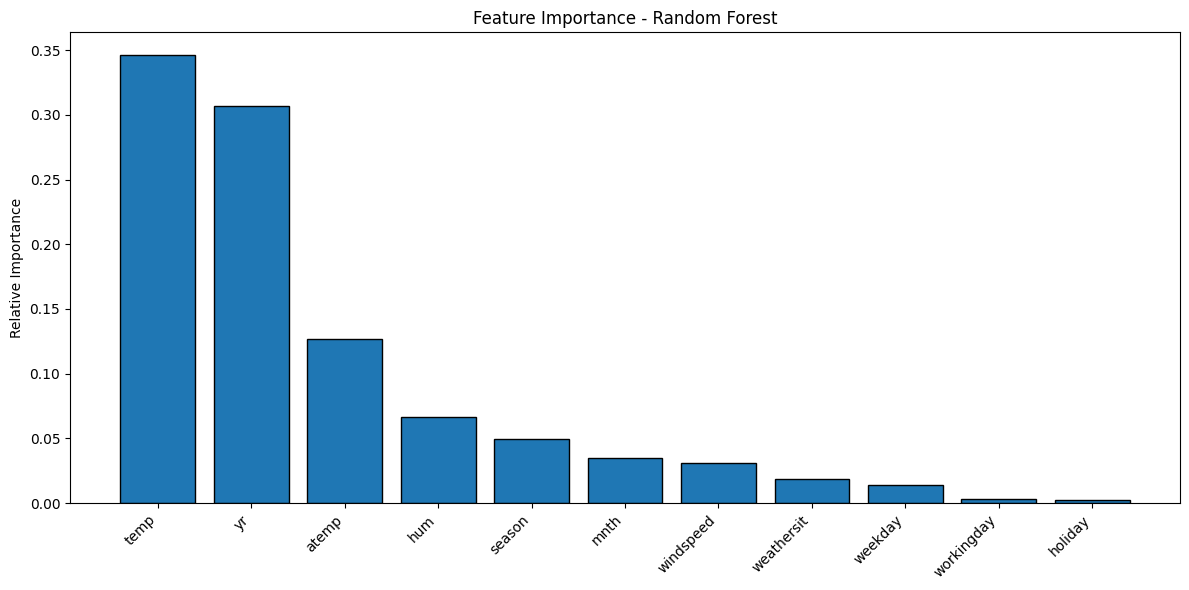

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Feature and Target Selection ---
X_train = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y_train = df['cnt']

X_test = df_last30.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y_test = df_last30['cnt']

# --- Model Training ---
rf_model = RandomForestRegressor(n_estimators=500, random_state=100, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- Prediction ---
y_pred = rf_model.predict(X_test)

# --- Model Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R Squared: {r2:.3f}")

# --- Feature Importance  ---

# Get importance scores and feature names
importances = rf_model.feature_importances_
features = np.array(X_train.columns)

# Sort features by importance (descending)
idx = np.argsort(importances)[::-1]
features_sorted = features[idx]
importances_sorted = importances[idx]

# Plot all features
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances_sorted)), importances_sorted, edgecolor="black")
plt.xticks(range(len(importances_sorted)), features_sorted, rotation=45, ha="right")
plt.ylabel("Relative Importance")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

### Feature Engineering Based on Importance Results

The feature importance plot shows that **weather variables (temperature, humidity, windspeed)** and **calendar effects (season, month, weekday)** contribute strongly to the model, while **holiday** and **workingday** have very little predictive power.  

To improve model performance, additional time-series features will be engineered:
- **Lag features** (demand last 3 days: `lag1`,`lag2`,`lag3` and last week `lag7`)  
- **Rolling averages** (3 and 7-day moving average)  

These features allow the model to capture **temporal dependencies and weekly patterns**, which Random Forest alone cannot infer from date variables.  

In [8]:
from xgboost import XGBRegressor

# --- Feature Engineering ---

# Add lag features to capture short-term and weekly demand dependencies.
# lag1: rentals yesterday
# lag2, lag3: rentals 2–3 days ago
# lag7: rentals on the same weekday last week
df_all['lag1'] = df_all['cnt'].shift(1)
df_all['lag2'] = df_all['cnt'].shift(2)
df_all['lag3'] = df_all['cnt'].shift(2)
df_all['lag7'] = df_all['cnt'].shift(7)

# Add rolling features to smooth short-term fluctuations
# rolling3: average rentals over the last 3 days
# rolling7: average rentals over the last 7 days
df_all['rolling3'] = df_all['cnt'].shift(1).rolling(3).mean()
df_all['rolling7'] = df_all['cnt'].shift(1).rolling(7).mean()

# Drop rows with NaN introduced by lag/rolling
df_all = df_all.dropna().reset_index(drop=True)

# --- Train/test split (last 30 days as test) ---
df_last30 = df_all.tail(30)
df = df_all.iloc[:-30, :]

# Define features and target - Drop identifiers and target-related columns
X_train = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'bikes_needed'])
y_train = df['cnt']

X_test = df_last30.drop(columns=['instant', 'dteday', 'casual',  'registered', 'cnt', 'bikes_needed'])
y_test = df_last30['cnt']

# --- Train Random Forest model ---
rf_model = RandomForestRegressor(n_estimators=1000, random_state=100, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- Prediction RF---
y_pred = rf_model.predict(X_test)

# --- Model Evaluation RF---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forrest:')
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R Squared: {r2:.3f}")

# --- Train XGBoost model ---
# Gradient boosting method, often stronger than Random Forest.
xgb_model = XGBRegressor(
    n_estimators=1000,     # more trees
    learning_rate=0.05,   # smaller learning rate
    max_depth=8,          # tree depth
    subsample=0.8,        # row sampling
    colsample_bytree=0.8, # feature sampling
    random_state=100,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# --- Prediction XGBoost---
y_pred_xg = xgb_model.predict(X_test)

# --- Model Evaluation XGBoost---
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print('\nXGBoost:')
print(f"RMSE: {rmse_xg:.2f}")
print(f"MAE: {mae_xg:.2f}")
print(f"R Squared: {r2_xg:.3f}")

Random Forrest:
RMSE: 952.62
MAE: 784.67
R Squared: 0.717

XGBoost:
RMSE: 881.42
MAE: 672.59
R Squared: 0.757


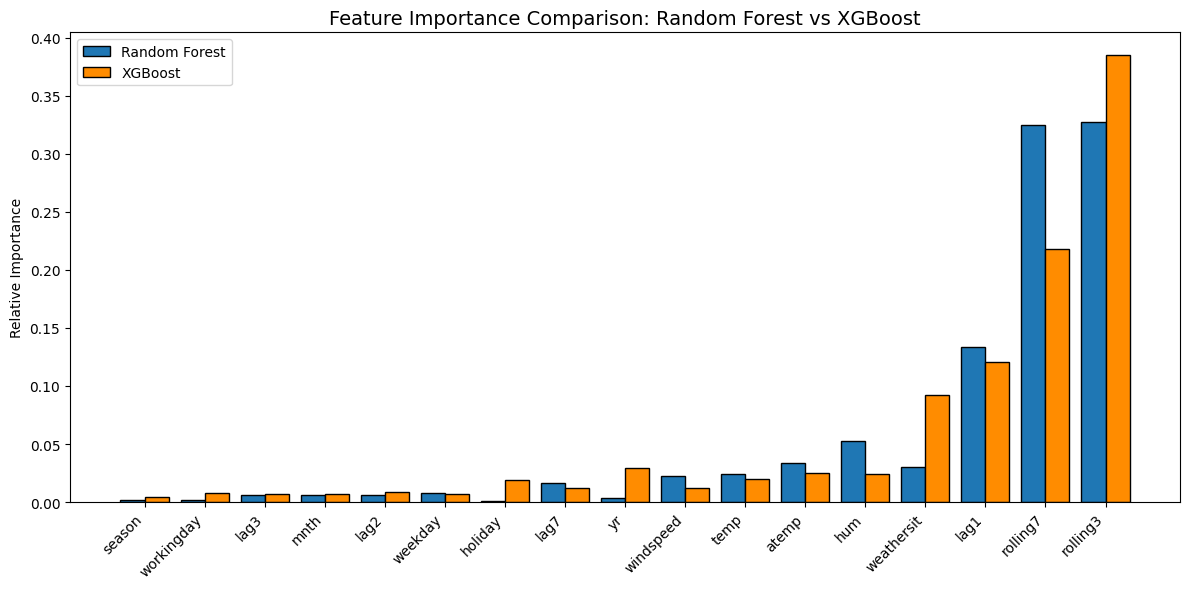

In [9]:
# --- Feature Importance  ---

# Collect importances and feature names
rf_imp = rf_model.feature_importances_
xgb_imp = xgb_model.feature_importances_
features = np.array(X_train.columns)

# Use a common ordering for fair visual comparison - Order features by the average importance across both models
avg_imp = (rf_imp + xgb_imp) / 2.0
order = np.argsort(avg_imp)  # ascending -> will plot from least at top to most at bottom

features_ord = features[order]
rf_imp_ord = rf_imp[order]
xgb_imp_ord = xgb_imp[order]


# Plot Bar-chart comparing feature importance of RF and XGBoost
bar_width = 0.4
x = np.arange(len(features_ord))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, rf_imp_ord, bar_width, label="Random Forest", edgecolor="black")
plt.bar(x + bar_width/2, xgb_imp_ord, bar_width, label="XGBoost", color="darkorange", edgecolor="black")

plt.xticks(x, features_ord, rotation=45, ha="right")
plt.ylabel("Relative Importance")
plt.title("Feature Importance Comparison: Random Forest vs XGBoost", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

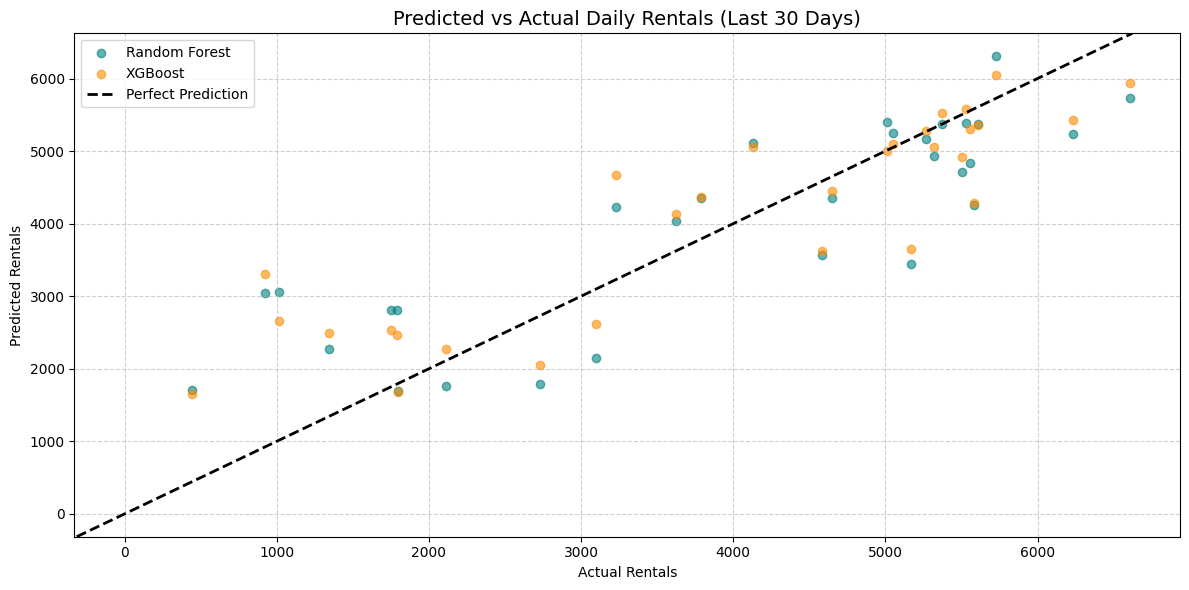

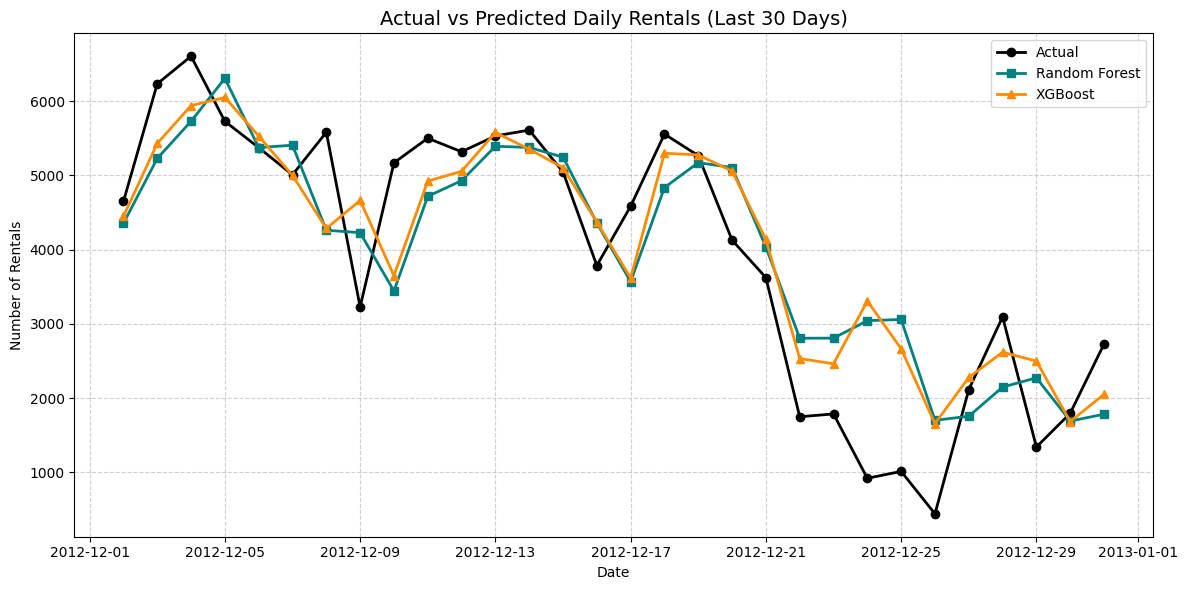

In [10]:
# --- Predicted vs Actual Plot for Random Forest and XGBoost ---
plt.figure(figsize=(12,6))

# Scatter plot for Random Forest
plt.scatter(y_test, y_pred, alpha=0.6, color="teal", label="Random Forest")

# Scatter plot for XGBoost
plt.scatter(y_test, y_pred_xg, alpha=0.6, color="darkorange", label="XGBoost")

# Add reference line y = x (perfect prediction)
plt.axline((0, 0), slope=1, color="black", linestyle="--", linewidth=2, label="Perfect Prediction")

plt.title("Predicted vs Actual Daily Rentals (Last 30 Days)", fontsize=14)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Time Series Plot: Actual vs Predicted (Last 30 Days) ---
plt.figure(figsize=(12,6))

plt.plot(df_last30['dteday'], y_test, label="Actual", color="black", linewidth=2, marker='o')
plt.plot(df_last30['dteday'], y_pred, label="Random Forest", color="teal", linewidth=2, marker='s')
plt.plot(df_last30['dteday'], y_pred_xg, label="XGBoost", color="darkorange", linewidth=2, marker='^')

plt.title("Actual vs Predicted Daily Rentals (Last 30 Days)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Answers / comments / reasoning:

**Assumption:** Since the split is already given, the last 30 days are used as test set and the rest as training set

#### Choice of Test Metric

The primary evaluation metric for daily demand prediction is **Root Mean Squared Error (RMSE)**.  

**RMSE** is defined as the square root of the mean of squared prediction errors. It is expressed in the same units as the target variable (`cnt`, number of rentals), which makes it directly interpretable as the average magnitude of prediction error. RMSE penalizes large deviations more strongly due to the squaring of errors, which is particularly relevant in this context since underestimation during peak demand days could lead to significant service shortages. 

In addition to RMSE, two supplementary metrics are reported:  

- **Mean Absolute Error (MAE)**: Represents the average absolute deviation between predictions and actual values. Unlike RMSE, MAE treats all errors equally and is less sensitive to extreme values. It provides a robust measure of the typical prediction error.  
- **Coefficient of Determination (R squared)**: Indicates the proportion of variance in the observed data that is explained by the model. An R squared value of 1 corresponds to perfect prediction, while an R squared of 0 implies that the model does not improve upon a naïve mean predictor. In this task, R² complements error-based metrics by quantifying how well the model captures overall demand variability.  

#### Approach
A predictive model was built to estimate **daily bike rental demand** (`cnt`).  
The task specified the use of Random Forest from scikit-learn, with the last 30 days as the test set and the rest as training data.

#### Feature Preparation
- Excluded non-predictive and target-related variables:
  - `instant`, `dteday` → identifiers  
  - `casual`, `registered` → leakage (subcomponents of `cnt`)  
  - `cnt` → target variable  
  - `bikes_needed` → analysis-only feature from Part 2  
- Added **time-series features** based on feature importance analysis:
  - **Lag features**: `lag1`, `lag2`, `lag3`, `lag7`  
  - **Rolling averages**: `rolling3`, `rolling7`  
- These additions capture short-term and weekly dependencies in demand that basic calendar and weather features cannot fully explain.

#### Models
- **Random Forest Regressor**: chosen as the baseline model.  
  - Robust to nonlinear relationships.  
  - Handles mixed feature types without scaling.  
  - Provides feature importance for interpretability.
- **XGBoost Regressor**: added as a second model.  
  - Gradient boosting is generally stronger than bagging for tabular prediction tasks.  
  - Captures complex feature interactions more effectively.  
  - Often provides higher accuracy than Random Forest at the cost of more tuning.

#### Results on Last 30 Days
- **Random Forest (scikit-learn):**
  - RMSE: **952.62**  
  - MAE: **784.67**  
  - R squared: **0.717**  
- **XGBoost:**  
  - RMSE: **881.42**  
  - MAE: **672.59**  
  - R squared: **0.757**

#### Interpretation
- Both models successfully capture demand patterns, with **lag and rolling features**  emerging as the dominant predictors. This underlines the importance of recent demand history in forecasting daily rentals.  
- **Random Forest** provides a strong baseline, while **XGBoost** achieves **lower errors (RMSE, MAE) and higher R squared**, confirming its advantage in modeling sequential dependencies and nonlinear feature interactions.  
- The feature importance comparison reveals that:
  - **Lag and rolling features** consistently outrank weather and calendar variables, showing that demand autocorrelation is the primary driver.  
  - **Weather variables** (humidity, temperature, apparent temperature) contribute moderately, consistent with real-world sensitivity of biking to weather conditions.  
  - **Calendar features** (season, month, weekday) have comparatively smaller impact, suggesting their effect is already embedded in recent demand history.  
  - `holiday` and `workingday` carry minimal weight, indicating they add little beyond the existing weekday variable for Random Forest. However for XGBoost a higher influence is seen.


#### Summary
- A demand prediction model was successfully built using Random Forest (scikit-learn) as required.  
- Performance was evaluated with RMSE, MAE, and R squared, confirming the model explains a substantial share of demand variance.  
- XGBoost was additionally applied to improve accuracy, and it achieved better predictive performance and complementary insights into feature drivers.



## Part 4 - Reflection / comments

This task provided valuable insights into both the analytical and predictive aspects of bike demand forecasting.  

**Key reflections:**
- **Data exploration and visualization** highlighted strong seasonality, weather influence, and high variability during summer months. Outliers were found to be real seasonal peaks rather than data errors, reinforcing the importance of retaining them.  
- **Fleet sizing analysis** (n95 vs nmax) demonstrated how statistical insights can translate directly into operational decisions, balancing service reliability and cost.  
- **Predictive modeling** showed that adding time-series features such as lags and rolling averages substantially improved accuracy, confirming the need to capture autocorrelation in demand.  
- **Model comparison** revealed that while Random Forest is a strong baseline, **XGBoost** achieved higher accuracy.

**Feature engineering observations:**
- Additional features such as sin/cos month encoding and weekend flags were tested but did not improve results and were therefore not included in the final models.  This suggests that much of the seasonality and calendar effects are already captured through the available features.  

**Possible next steps:**
- **Model improvements**:  
  - Experiment with other boosting algorithms such as LightGBM.  
  - Apply hyperparameter tuning (e.g. Bayesian optimization) to optimize model performance.  
  - Consider ML models like LSTM or GRU to capture temporal structure more explicitly.  
- **Feature enhancements**:
  - Include longer lags (14, 30 days) to capture bi-weekly and monthly patterns.  
  - Engineer extreme weather flags (heatwave, snow, storm) to better capture rare demand shifts.  
  - Add trend features (e.g., cumulative average demand, days since launch) to account for long-term growth.  
  - Leverage hourly data (`hour.csv`) to create aggregated features such as peak-hour usage, weekend vs weekday hourly ratios, or variance of daily usage.
  - Include more data when available.
- **External data sources**:  
  - Public event calendars (concerts, sports).  
  - Traffic disruptions or fuel price data.  
  - Weather forecast data for true forward-looking prediction.  
- **Operational focus**:    
  - Build retraining pipelines for weekly or monthly model updates with fresh data.  

**Summary:**  
Overall, the exercise was well-structured and offered a realistic perspective on the challenges of balancing interpretability, predictive performance, and operational decision-making in demand forecasting. The current results are strong for a daily demand forecast using only internal data, but future improvements will depend on richer features, external signals, and advanced boosting models.


## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.